In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Aqui se lê os dados apartir da pasta Aluno.
data = pd.read_csv('alesp_deputados_gastos.csv',
                   sep = ';',
                   encoding = 'latin-1', 
                   dtype = {'CNPJ': np.str, 
                            'Valor': np.float,
                            'Ano': np.int}, 
                   low_memory = False)

#Resultados trazidos.
print(f'Registros em análise: {len(data)} \n\
Deputados em análise: {data["deputado"].nunique()} \n\
Fornecedores em análise: {data["cnpj"].nunique()} \n\
Total das notas fiscais em análise: R$ {data["valor"].sum()} \n\
Período: {data["ano"].min()}-{data["ano"].max()}')

Registros em análise: 227140 
Deputados em análise: 285 
Fornecedores em análise: 2522 
Total das notas fiscais em análise: R$ 155902963.81999996 
Período: 2002-2018


In [66]:
data['tipo'] = data['tipo'].astype('category')
data['tipo'].cat.categories

#Alteração dos formatos do arquivo para as categorias.
data['tipo'].cat.rename_categories([
    'Combustível',
    'Locação e manutenção de bens móveis e imóveis',
    'Manutenção de veículos e pedágios',
    'Serviço gráfico e xerox',
    'Material de escritório',
], inplace = True)

#Groupby por categoria
df_tipo = data.groupby(['tipo']).agg({'valor': sum})\
                                .sort_values('valor', ascending = False)\
                                .reset_index()

#Cálculo da porcentagem pelas categorias.
df_tipo['porcentagem'] = (df_tipo['valor'] / df_tipo['valor'].sum()) * 100

#Alteração do formato para decimais - 2 casas.
df_tipo['valor'] = df_tipo['valor'].map('{0:.2f}'.format)
df_tipo['porcentagem'] = df_tipo['porcentagem'].map('{0:.2f}'.format)

#Resultado
df_tipo

,tipo,valor,porcentagem
0,Serviço gráfico e xerox,67771067.98,43.47
1,Combustível,40949385.80,26.27
2,Locação e manutenção de bens móveis e imóveis,19659189.49,12.61
3,Material de escritório,18570214.85,11.91
4,Manutenção de veículos e pedágios,8953105.70,5.74


c:\users\aluno\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\aluno\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


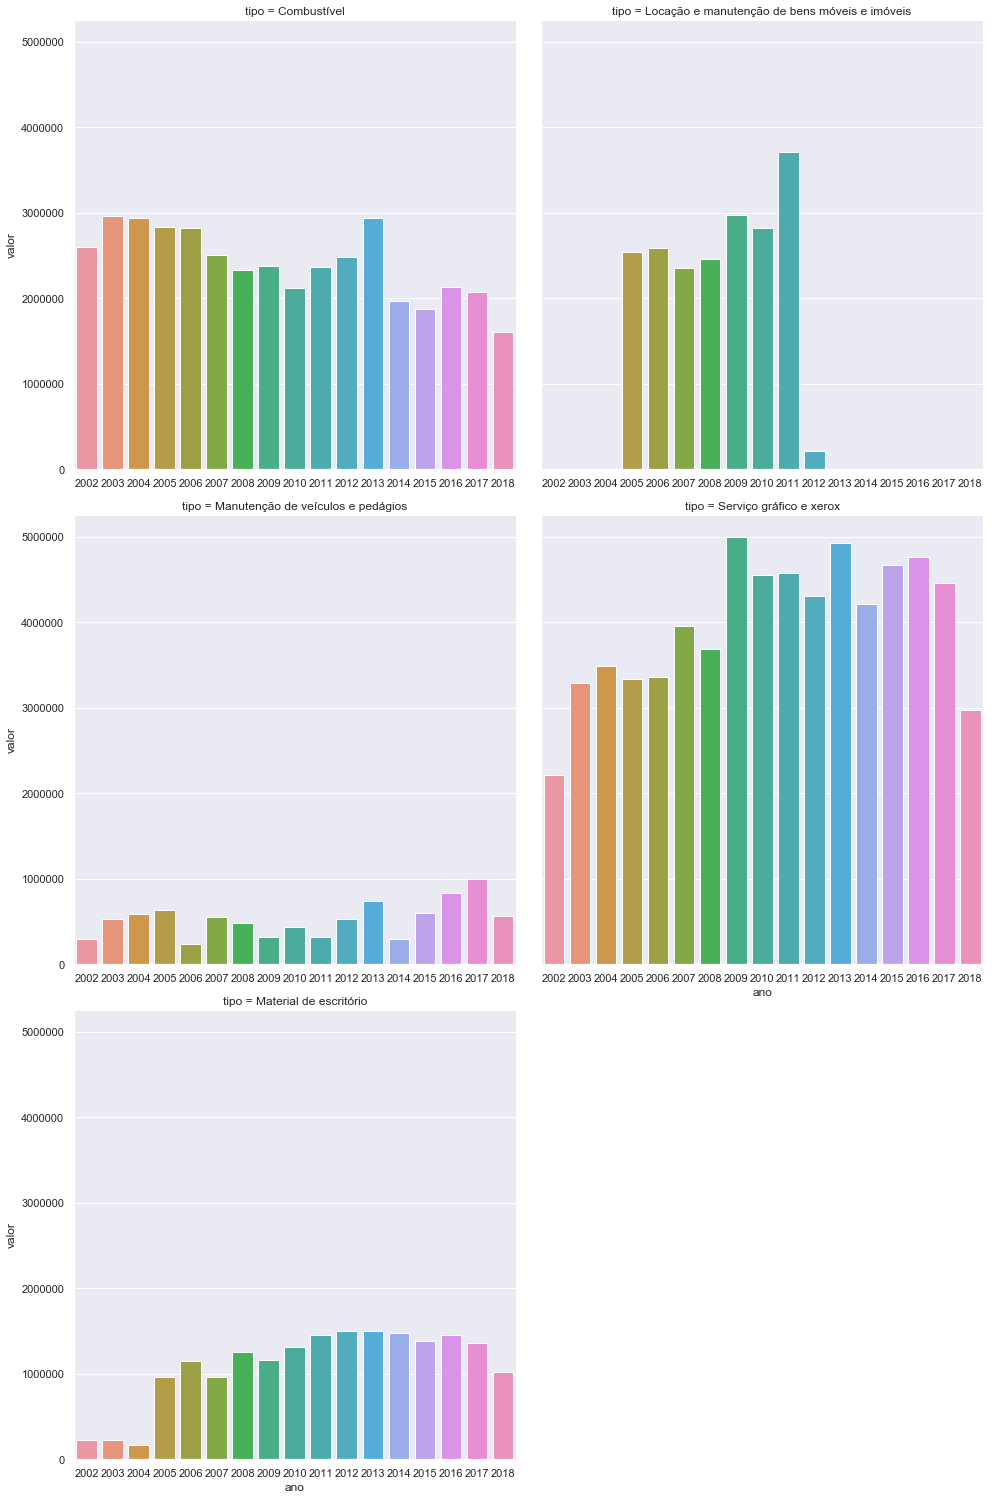

In [67]:
#Plotar grafico pelas categorias
sns.set()
grafico = data.groupby(['tipo', 'ano']).agg({'valor': sum})\
                                       .sort_values('valor', ascending = False)\
                                       .reset_index()
grafico['porcentagem'] = (grafico['valor'] / grafico['valor'].sum()) * 100
grafico.style.format({'porcentagem': '{:,.2f}'.format, 'valor': '{:,.2f}'.format})
sns.factorplot(x='ano', 
               y='valor', 
               col='tipo', 
               data=grafico, 
               col_wrap=2, 
               kind='bar', 
               sharex=False, 
               sharey=True, 
               size=7)

# Resultado
sns.despine()

In [68]:
# Recorte dos dados para a atual legislatura (de 2016 até agora)
data = data[data['ano'] >= 2016]

# Resultados
print(f'Quantidade de registros em análise: {len(data)} \n\
Deputados em análise: {data["deputado"].nunique()} \n\
Fornecedores em análise: {data["cnpj"].nunique()} \n\
Total das notas fiscais em análise: R$ {data["valor"].sum()} \n\
Período: {data["ano"].min()}-{data["ano"].max()}')

Quantidade de registros em análise: 30133 
Deputados em análise: 105 
Fornecedores em análise: 1323 
Total das notas fiscais em análise: R$ 24242524.939999998 
Período: 2016-2018


In [69]:
# Groupby dos gastos por categoria
df_tipo = data.groupby(['tipo']).agg({'valor': sum})\
                                .sort_values('valor', ascending = False)\
                                .reset_index()

#Calculo da porcentagem por cada categoria em cima do valor total
df_tipo['porcentagem'] = (df_tipo['valor'] / df_tipo['valor'].sum()) * 100

# Formatação de números para duas casas decimais
df_tipo['valor'] = df_tipo['valor'].map('{0:.2f}'.format)
df_tipo['porcentagem'] = df_tipo['porcentagem'].map('{0:.2f}'.format)

# Resultado
df_tipo

,tipo,valor,porcentagem
0,Serviço gráfico e xerox,12203598.83,50.34
1,Combustível,5810640.53,23.97
2,Material de escritório,3843142.10,15.85
3,Manutenção de veículos e pedágios,2385143.48,9.84
4,Locação e manutenção de bens móveis e imóveis,0.00,0.00


In [70]:
# Recorte para o tipo 'Serviço gráfico e xerox'
data = data[data['tipo'] == 'Serviço gráfico e xerox']

# Resultados
print(f'Registros em análise: {len(data)} \n\
Quantidade de deputados: {data["deputado"].nunique()} \n\
Quantidade de fornecedores: {data["cnpj"].nunique()} \n\
Soma das notas fiscais em análise: R$ {data["valor"].sum()} \n\
Período: {data["ano"].min()}-{data["ano"].max()}')

Registros em análise: 2226 
Quantidade de deputados: 103 
Quantidade de fornecedores: 263 
Soma das notas fiscais em análise: R$ 12203598.83 
Período: 2016-2018


In [71]:
# Agrupamento por CNPJ ou CPF
df_forn = data.groupby(['cnpj']).agg({'valor': sum})\
                                .sort_values('valor', ascending = False)\
                                .reset_index()

# Cálculo de porcentagem de cada fornecedor
df_forn['porcentagem'] = (df_forn['valor'] / df_forn['valor'].sum()) * 100

# Formatação de números para duas casas decimais
df_forn['valor'] = df_forn['valor'].map('{0:.2f}'.format)
df_forn['porcentagem'] = df_forn['porcentagem'].map('{0:.2f}'.format)

# Resultado
df_forn

,cnpj,valor,porcentagem
0,"1,07E+13",452952.95,3.71
1,"2,52E+13",342784.80,2.81
2,"1,05E+13",315366.44,2.58
3,"3,14E+12",281300.00,2.31
4,"1,04E+13",280981.85,2.30
5,"7,31E+13",274200.00,2.25
6,"3,48E+12",265947.30,2.18
7,"4,90E+13",254963.69,2.09
8,"9,90E+11",252585.00,2.07
9,"5,45E+13",247654.40,2.03


In [72]:
# Recorte para as 20 empresas
forn_30 = df_forn.iloc[:20,:]

# Seleção das 20 empresas com maior porcentagem das 263

top_forn = data['cnpj'].isin(forn_30['cnpj'])
fornecedores = data[top_forn]

# Agrupamento de valores por fornecedor e deputado


fornecedores_grupo = fornecedores.groupby(['cnpj', 'fornecedor', 'deputado'])\
                                 .agg({'valor': sum})
#Formatação do valor para moeda.    
pd.options.display.float_format = 'R$ {:,.2f}'.format

# Resultado
fornecedores_grupo

valor
cnpj     fornecedor                                         deputado                           
1,04E+13 GRAFICA COPCENTRO LTDA-EPP                         HÉLIO NISHIMOTO        R$ 29,620.00
         SISTTEM GRAFICA & EDITORA LTDA                     BARROS MUNHOZ           R$ 6,337.50
                                                            CELSO NASCIMENTO      R$ 105,143.00
                                                            DELEGADO OLIM          R$ 12,005.00
                                                            GILMAR GIMENES         R$ 13,770.00
                                                            ITAMAR BORGES          R$ 76,039.00
                                                            JORGE CARUSO           R$ 25,265.00
                                                            MARCO VINHOLI           R$ 6,442.35
                                                            MÁRCIO CAMARGO          R$ 6,360.00
1,05E+13 CINTIA DA SILVA SOUZA COMUNICAÇÃO VISUAL ME        AFONSO LOBATO          R$ 71,980.00
         PHOENIX ACABAMENTOS GRAFICOS LTDA                  WELLINGTON MOURA      R$ 240,509.10
         RAFAEL PAULO DA FONSECA ME                         ADILSON ROSSI             R$ 500.00
         RY. GRAFER GRAFICA LTDA ME                         CHICO SARDELLI          R$ 2,377.34
1,07E+13 ALPHA COMÃRCIO DE PRODUTOS GRÁFICOS LTDA-ME       GILMACI SANTOS         R$ 20,308.00
         ARTES GRAFICAS ENTRELINHAS LTDA                    JOSÉ ZICO PRADO       R$ 255,952.00
         ARTES GRÁFICAS ENTRELINHAS LTDA                    LUIZ FERNANDO             R$ 880.00
         STUDIO AB COMUNICAÇÃO VISUAL LTDA                  LUIZ FERNANDO         R$ 161,904.65
         STUDIO AB COMUNICAÇÃO VISUAL LTDA-EPP              MARTA COSTA            R$ 13,908.30
2,25E+12 VALTER GOMES FRANCA - ME                           ADILSON ROSSI           R$ 6,326.00
         VALTER GOMES FRANCA - ME                           ROBERTO ENGLER        R$ 206,250.00
2,52E+13 LIBERALINA FREIRE MOURA ME                         ALENCAR SANTANA BRAGA   R$ 4,400.00
                                                            GILENO GOMES            R$ 6,390.00
                                                            LECI BRANDÃO           R$ 23,105.00
                                                            MARTA COSTA           R$ 103,280.00
                                                            MÁRCIO CAMARGO         R$ 62,929.80
                                                            PROFESSOR AURIEL      R$ 142,680.00
2,73E+11 EDITORA J G RIO PRETO LTDA ME                      SEBASTIÃO SANTOS      R$ 239,260.00
3,14E+12 MARCO ANTONIO D A AVILA ALVES ME                   JUNIOR APRILLANTI       R$ 6,800.00
         MARCO ANTONIO D AVILA                              ABELARDO CAMARINHA    R$ 259,500.00
         MARCO ANTONIO D AVILA ALVES ME                     AIRTON GARCIA          R$ 15,000.00
3,43E+12 C B DOS SANTOS GRAFICA                             CÁSSIO NAVARRO         R$ 43,139.70
         C.B DOS SANTOS GRAFICA - ME ART GRAPHICA OFFSET    CAIO FRANÇA           R$ 170,917.00
         C.B. DOS SANTOS GRAFICA -ME                        DAVI ZAIA               R$ 3,500.00
         GRAFICA BOCA BOA LTDA EPP                          LUIZ FERNANDO MACHADO  R$ 15,546.00
3,48E+12 LILIAN CAVALCANTI BITENCOURT DANIEL ME             CARLOS NEDER          R$ 138,399.12
                                                            JOSÉ AMÉRICO          R$ 127,548.18
4,90E+13 IGRAL INDUSTRIA GRAFICA LTDA EPP                   FERNANDO CURY         R$ 253,589.00
         J. CAETANO DE SOUZA- ME                            ANALICE FERNANDES       R$ 1,374.69
4,99E+12 K. M. R. EDITORA LTDA.                             MILTON VIEIRA         R$ 216,980.00
5,10E+13 ABRAL GRAFICA & EDITORA LTDA                       ADILSON ROSSI          R$ 86,660.98
         ABRAL GRÁFICA & EDITORA LTDA ME                  